In [1]:
%pylab inline
import os, sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
import json
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates

import pandas as pd

In /Users/onurvarol/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/onurvarol/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/onurvarol/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/onurvarol/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/onurvarol/anaconda/lib/python3.6/site-

Populating the interactive namespace from numpy and matplotlib


In [2]:
bookshelf = json.loads(open('docs/bookshelf.json','r').read())['books']
count = 0
for b in bookshelf:
    if '(' in b['name'] and ')' in b['name']:
        #print b['name']#.split('(')[-1].split(')')[0]
        count += int(b['name'].split('(')[-1].split(')')[0])
    else:
        count += 1
print (count, 'books read')

392 books read


In [3]:
monthly = dict()
monthlyA, monthlyB = dict(), dict()
for b in bookshelf:
    if len(b['date'].split('-')) < 2:
        continue
    dstr = '-'.join(b['date'].split('-')[:2])
    if dstr not in monthly:
        monthly[dstr] = 0
        monthlyA[dstr] = 0
        monthlyB[dstr] = 0
        
    if '(' in b['name'] and ')' in b['name']:
        #print b['name']#.split('(')[-1].split(')')[0]
        nBook = int(b['name'].split('(')[-1].split(')')[0])
        monthly[dstr] += nBook
        if 'audio' in b:
            monthlyA[dstr] += nBook
        else:
            monthlyB[dstr] += nBook
    else:
        monthly[dstr] += 1
        if 'audio' in b:
            monthlyA[dstr] += 1
        else:
            monthlyB[dstr] += 1
            
#print (monthly, sum(monthly.values()))
for m in sorted(monthly):
    print(m, monthly[m])

2006-06 1
2006-07 1
2007-01 2
2007-04 1
2007-06 1
2007-07 2
2007-09 3
2007-10 1
2007-12 1
2008-05 1
2008-06 2
2008-07 5
2008-08 2
2008-10 2
2008-11 2
2009-01 2
2009-03 1
2009-04 2
2009-05 2
2009-06 3
2009-07 1
2009-08 1
2009-09 3
2009-11 2
2009-12 2
2010-02 4
2010-03 2
2010-04 1
2010-05 1
2010-07 2
2010-08 1
2010-09 4
2010-10 1
2010-11 1
2011-02 1
2011-03 3
2011-04 2
2011-05 3
2011-06 4
2011-07 1
2011-08 7
2011-09 7
2011-11 2
2011-12 2
2012-01 4
2012-02 2
2012-03 1
2012-05 1
2012-08 2
2012-09 1
2012-10 2
2012-11 1
2013-01 2
2013-02 3
2013-03 2
2013-05 1
2013-07 2
2013-08 1
2013-12 1
2014-03 1
2014-04 3
2014-05 4
2014-06 3
2014-07 3
2014-08 4
2014-12 4
2015-01 2
2015-02 4
2015-03 3
2015-04 1
2015-06 3
2015-07 1
2015-10 3
2015-11 4
2015-12 4
2016-01 3
2016-02 1
2016-05 3
2016-06 5
2016-07 6
2016-08 2
2016-09 2
2016-10 5
2016-11 5
2016-12 2
2017-01 5
2017-02 1
2017-04 1
2017-05 3
2017-06 3
2017-07 1
2017-08 2
2017-09 3
2017-10 2
2017-11 3
2017-12 4
2018-01 3
2018-02 1
2018-04 2
2018-07 1


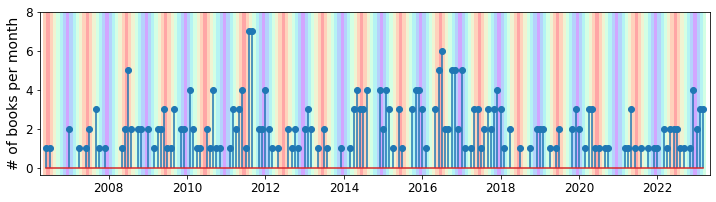

In [4]:
mSorted = sorted(monthly.keys())
#for m in mSorted:
#    print m, monthly[m], datetime.strptime(m, '%Y-%m')
    
fig = plt.figure(figsize=(12,3))
plt.stem([datetime.strptime(m, '%Y-%m') for m in mSorted], [monthly[m] for m in mSorted])
plt.ylim(ymax=max(monthly.values())+1)
plt.xlim(xmin=datetime.strptime(mSorted[0], '%Y-%m') + relativedelta(months=-2), 
         xmax=datetime.strptime(mSorted[-1], '%Y-%m') + relativedelta(months=+2))

sDate = datetime.strptime(mSorted[0], '%Y-%m') + relativedelta(months=-1)
eDate = datetime.strptime(mSorted[-1], '%Y-%m') + relativedelta(months=+1)
while sDate < eDate:
    temp = sDate + relativedelta(months=+1)
    cval = 1-abs(sDate.month-6)/6.0
    plt.axvspan(sDate, temp, facecolor=plt.cm.rainbow(cval),#'{}'.format(), 
                edgecolor='none',alpha=0.35)
    sDate = temp

plt.ylabel('# of books per month', fontsize=14)
plt.tick_params(labelsize=12)
plt.savefig('docs/reading_monthly_freq_stem.png', bbox_inches='tight', dpi=300, transparent=True)

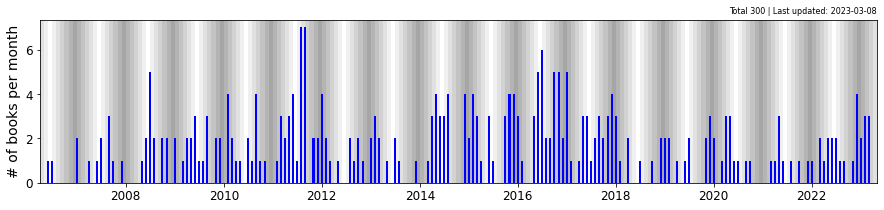

In [5]:
fig = plt.figure(figsize=(15,3))
mSorted = sorted(monthly.keys())
sDate = datetime.strptime(mSorted[0], '%Y-%m') + relativedelta(months=-2)
eDate = datetime.strptime(mSorted[-1], '%Y-%m') + relativedelta(months=+2)
while sDate < eDate:
    temp = sDate + relativedelta(months=+1)
    cval = 1-abs(sDate.month-6)/6.0
    plt.axvspan(sDate, temp, facecolor=plt.cm.gray(cval),#'{}'.format(), 
                edgecolor='none',alpha=0.35)
    sDate = temp

mSorted = [m for m in sorted(monthly.keys()) if monthly[m]>0]
plt.bar([datetime.strptime(m, '%Y-%m') for m in mSorted], 
        [monthly[m] for m in mSorted], label='Book', 
        width = 15, linewidth=0, color='b')

plt.xlim(xmin=datetime.strptime(mSorted[0], '%Y-%m') + relativedelta(months=-2), 
         xmax=datetime.strptime(mSorted[-1], '%Y-%m') + relativedelta(months=+2))
plt.ylabel('# of books per month', fontsize=14)
plt.title('Total {} | Last updated: {}'.format(sum(list(monthly.values())), datetime.today().strftime('%Y-%m-%d')), 
          fontsize=8, loc='right')
plt.tick_params(labelsize=12)
plt.savefig('docs/reading_monthly_freq.png', bbox_inches='tight', dpi=300, transparent=True)

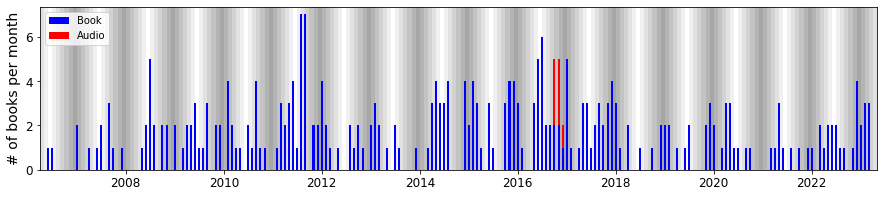

In [6]:
fig = plt.figure(figsize=(15,3))
mSorted = sorted(monthly.keys())
sDate = datetime.strptime(mSorted[0], '%Y-%m') + relativedelta(months=-2)
eDate = datetime.strptime(mSorted[-1], '%Y-%m') + relativedelta(months=+2)
while sDate < eDate:
    temp = sDate + relativedelta(months=+1)
    cval = 1-abs(sDate.month-6)/6.0
    plt.axvspan(sDate, temp, facecolor=plt.cm.gray(cval),#'{}'.format(), 
                edgecolor='none',alpha=0.35)
    sDate = temp

mSorted = [m for m in sorted(monthlyB.keys()) if monthlyB[m]>0]
plt.bar([datetime.strptime(m, '%Y-%m') for m in mSorted], 
        [monthlyB[m] for m in mSorted], label='Book', 
        width = 15, linewidth=0, color='b')

mSortedA = [m for m in sorted(monthlyA.keys()) if monthlyA[m]>0]
plt.bar([datetime.strptime(m, '%Y-%m') for m in mSortedA], 
        [monthlyA[m] for m in mSortedA],
        bottom=[monthlyB.get(m,0) for m in mSortedA],
        label='Audio', linewidth=0, color='r', width=15)
plt.xlim(xmin=datetime.strptime(mSorted[0], '%Y-%m') + relativedelta(months=-2), 
         xmax=datetime.strptime(mSorted[-1], '%Y-%m') + relativedelta(months=+2))
plt.ylabel('# of books per month', fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(loc='upper left')
plt.savefig('docs/reading_monthly_freq_waudio.png', bbox_inches='tight', dpi=300, transparent=True)

In [7]:
authorCount = dict()

for b in bookshelf:
    if b['author'] not in authorCount:
        authorCount[b['author']] = 0
    
    if '(' in b['name'] and ')' in b['name']:
        #print b['name']#.split('(')[-1].split(')')[0]
        authorCount[b['author']] += int(b['name'].split('(')[-1].split(')')[0])
    else:
        authorCount[b['author']] += 1

for a in sorted(authorCount, key=authorCount.get, reverse=True)[:20]:
    print (a, authorCount[a])

Gulten Dayioglu 16
Margaret Weis &amp; Tracy Hickman 11
Stephen King 10
Paulo Coelho 7
J.K. Rowling 7
Rifat Ilgaz 6
Sezgin Kaymaz 5
Jules Verne 5
Christopher Grange 5
Cixin Liu 4
Stanislaw Lem 4
L. Frank Baum 4
Amin Maalouf 4
Sigmund Freud 4
Bernard Werber 4
Dan Brown 4
Franz Kafka 3
Philip Pullman 3
Daniel Quinn 3
Ursula K. LeGuin 3


103
[datetime.datetime(2009, 5, 20, 0, 0), datetime.datetime(2015, 1, 23, 0, 0), datetime.datetime(2015, 12, 9, 0, 0), datetime.datetime(2015, 12, 25, 0, 0), datetime.datetime(2015, 12, 26, 0, 0), datetime.datetime(2015, 12, 30, 0, 0), datetime.datetime(2016, 1, 15, 0, 0), datetime.datetime(2016, 1, 18, 0, 0), datetime.datetime(2016, 1, 30, 0, 0), datetime.datetime(2016, 2, 7, 0, 0), datetime.datetime(2016, 5, 13, 0, 0), datetime.datetime(2016, 5, 16, 0, 0), datetime.datetime(2016, 5, 20, 0, 0), datetime.datetime(2016, 6, 5, 0, 0), datetime.datetime(2016, 6, 15, 0, 0), datetime.datetime(2016, 6, 16, 0, 0), datetime.datetime(2016, 6, 17, 0, 0), datetime.datetime(2016, 6, 30, 0, 0), datetime.datetime(2016, 7, 5, 0, 0), datetime.datetime(2016, 7, 8, 0, 0), datetime.datetime(2016, 7, 11, 0, 0), datetime.datetime(2016, 7, 15, 0, 0), datetime.datetime(2016, 7, 21, 0, 0), datetime.datetime(2016, 7, 24, 0, 0), datetime.datetime(2016, 8, 9, 0, 0), datetime.datetime(2016, 8, 18, 0, 0), datetime.

(array([22., 25., 12., 13.,  5.,  5.,  5.,  1.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  2.,  1.,  2.,  0.,  1.,  0.,  0.,  1.,  1.]),
 array([ 1. ,  4.8,  8.6, 12.4, 16.2, 20. , 23.8, 27.6, 31.4, 35.2, 39. ,
        42.8, 46.6, 50.4, 54.2, 58. , 61.8, 65.6, 69.4, 73.2, 77. , 80.8,
        84.6, 88.4, 92.2, 96. ]),
 <a list of 25 Patch objects>)

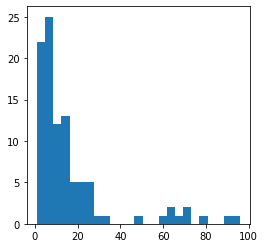

In [8]:
# Inter-event time for finishing books
readDates = list()
for b in bookshelf:
    if len(b['date'].split('-')) < 3:
        continue
    readDates.append(datetime.strptime(b['date'], '%Y-%m-%d'))
print(len(readDates))

sortedDates = sorted(readDates)
print (sortedDates)
tdiff = [(sortedDates[i]-sortedDates[i-1]).days for i in range(1, len(sortedDates))]
print (tdiff)

plt.figure(figsize=(4,4))
plt.hist(sorted(tdiff)[:-3], bins=25)